# 2. Data Exploration: Listings_clean.csv
<hr/>

We will now explore the data to get a better understanding of the relationship between the observations as well as the relationship between each observation and predictor.

1. Check for collinearity among the features
2. Visualize relationship between each predictor and price
3. Visualize the target variable to identify any skewness and any necessary transformations
4. Visualize the supply of Airbnb homes by location and compute statistics for the average home in each region

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
%matplotlib inline

In [3]:
data = pd.read_csv('../datasets/listings_clean.csv')

We will use the scatter_matrix function in Pandas to visualize a matrix of each predictor as a function of another which is useful to check for any collinearity among the predictors. The cells running through the diagonal of the matrix contain a histogram with its values on the X axis.

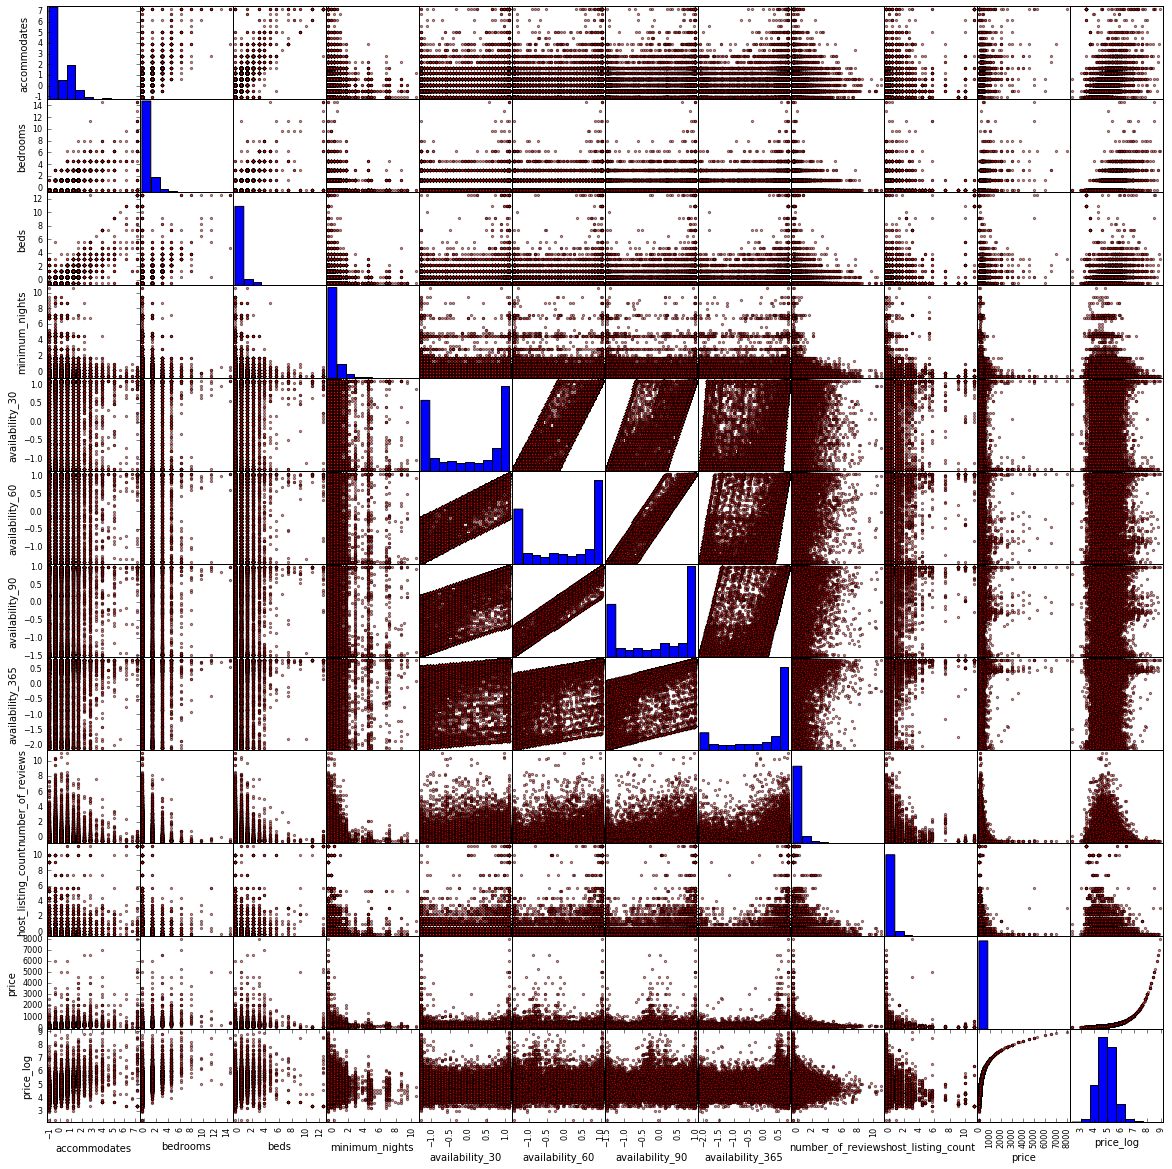

In [4]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'host_listing_count', 'price', 'price_log']
axs = pd.scatter_matrix(data[matrix_cols], figsize=(20, 20), c='red')

Based on the matrix output, there does not seem to be any obvious problems amongst the preictors. There does seem to be a relationship between the following predictors: `accommodates`, `bedrooms`, `beds` and `guests_included`. This makes intuitive sense as the more bedrooms a listing has the more individuals it can accommodate. However, we do see that the results are loosely related and not resemblance of a straight line which may be a result of varying accommodations, sleeping arrangements and layout of the listing itself. Thus, there is no strong evidence of collinearity among the predictors. We do note that the distributions for all predictors are strongly skewed right (including the standardization as well). Again, this makes intuitive sense as a majority of listings on Airbnb are single bed listings that typically seek to accommodate 1 or few persons.

In [35]:
col_names = list(data.columns.values)
col_names

['id',
 'host_id',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'host_listing_count',
 '10001',
 '10002',
 '10003',
 '10004',
 '10005',
 '10006',
 '10007',
 '10009',
 '1001',
 '10010',
 '10011',
 '10012',
 '10013',
 '10014',
 '10016',
 '10017',
 '10018',
 '10019',
 '10021',
 '10022',
 '10023',
 '10024',
 '10025',
 '10026',
 '10027',
 '10028',
 '10029',
 '10030',
 '10031',
 '10032',
 '10033',
 '10034',
 '10035',
 '10036',
 '10037',
 '10038',
 '10039',
 '10040',
 '10044',
 '10045',
 '10065',
 '10069',
 '10075',
 '10080',
 '10128',
 '10162',
 '10280',
 '10281',
 '10282',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '10310',
 '10312',
 '10314',
 '10451',
 '10452',
 '10453',
 '10454',
 '10455',
 '10456',
 '10457',
 '10458',
 '10459',
 '10460',
 '10461',
 '10462',
 '10463',
 '10464',
 '10465',
 '10466',
 '10467',
 '10468',
 '10

In [30]:
zips = []
for i in range(13, 193):
    zips.append(data.ix[:, i].sum())

In [31]:
codes = []
for i in range(13, 193):
    codes.append(col_names[i])

In [32]:
zipcode = pd.DataFrame({'Zip': codes, 'count': zips})

In [34]:
zipcode.to_csv('zipcode_csv')